In [2]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
from fastai.tabular.core import *
from fastai.data.transforms import *
from fastcore.all import *
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [4]:
%matplotlib inline
# import plotly as py
# import plotly.tools as tls
# import matplotlib.pyplot as plt

# py.offline.init_notebook_mode(connected=True)
# from plotly.offline import iplot

# pd.options.plotting.backend = "plotly"

import seaborn as sns
import matplotlib.pyplot as plt

## initial viz settings ##
sns.set(font_scale=1.2)
col = "#3B1C8C"
cm = "viridis"

<IPython.core.display.Javascript object>

In [6]:
path = Path(
    "/Users/gaurav.adlakha/Documents/attendance_s3_date/attendance_append_data.csv"
)

<IPython.core.display.Javascript object>

In [7]:
%%time
df = pd.read_csv(path)

<timed exec>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 20.2 s, sys: 2.88 s, total: 23 s
Wall time: 23.1 s


<IPython.core.display.Javascript object>

In [8]:
len(df)

10455523

<IPython.core.display.Javascript object>

In [9]:
make_date(df, "ATTENDANCEDATE")
add_datepart(df, "ATTENDANCEDATE")

,Unnamed: 0,SCHOOLYEAR,SCHOOLDCID,PRESENCE_STATUS_CD,STUDENTID,LASTFIRST,SCHOOLID,STUDENTDCID,SECTIONENROLLMENTDCID,CALENDARDCID,...,ATTENDANCEDATEDay,ATTENDANCEDATEDayofweek,ATTENDANCEDATEDayofyear,ATTENDANCEDATEIs_month_end,ATTENDANCEDATEIs_month_start,ATTENDANCEDATEIs_quarter_end,ATTENDANCEDATEIs_quarter_start,ATTENDANCEDATEIs_year_end,ATTENDANCEDATEIs_year_start,ATTENDANCEDATEElapsed
0,0,2020,4703,Present,162339,"Ledesma-Chavez, Briston",260396,678625,-1,583752,...,28,0,272,False,False,False,False,False,False,1.601251e+09
1,1,2020,4680,Present,199137,"Zappala, Najee Shakyia",260361,711581,-1,575867,...,29,1,273,False,False,False,False,False,False,1.601338e+09
2,2,2020,4680,Present,161792,"Yusckat, Abbigale Ja'Niya",260361,678176,-1,575867,...,29,1,273,False,False,False,False,False,False,1.601338e+09
3,3,2020,4680,Present,219964,"Fetzer, Karalyn",260361,730963,-1,575867,...,29,1,273,False,False,False,False,False,False,1.601338e+09
4,4,2020,4680,Present,162963,"Donegan Sanchez, Lashaun",260361,679061,-1,575867,...,29,1,273,False,False,False,False,False,False,1.601338e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10455518,95381,2020,4700,Present,216478,"Medina Rodriguez, Vianna Makwaata",260383,727518,-1,585799,...,20,3,233,False,False,False,False,False,False,1.597882e+09
10455519,95382,2020,4700,Absent,175837,"Nassar, Myles",260383,690669,-1,585799,...,20,3,233,False,False,False,False,False,False,1.597882e+09
10455520,95383,2020,4700,Present,116126,"Conigland, Kasey Keori",260383,640193,-1,585799,...,20,3,233,False,False,False,False,False,False,1.597882e+09
10455521,95384,2020,4700,Present,113450,"Wyche, Tabitha Korbyn",260383,638371,-1,585799,...,20,3,233,False,False,False,False,False,False,1.597882e+09


<IPython.core.display.Javascript object>

In [10]:
list(df.columns)

['Unnamed: 0',
 'SCHOOLYEAR',
 'SCHOOLDCID',
 'PRESENCE_STATUS_CD',
 'STUDENTID',
 'LASTFIRST',
 'SCHOOLID',
 'STUDENTDCID',
 'SECTIONENROLLMENTDCID',
 'CALENDARDCID',
 'PERIODDCID',
 'ATTENDANCECODEDCID',
 'SCHEDULINGTERMYEARDCID',
 'ATTENDANCEMODECODE',
 'TOTALMINUTESATTENDED',
 'ATTENDANCECOMMENT',
 'ATTENDANCE_CODE_DESCRIPTION',
 'ADAVALUECODE',
 'ADAVALUETIME',
 'ADMVALUE',
 'ATTENDANCEFLAGS',
 'GRADELEVEL',
 'SOURCESYSTEMID',
 'ATTENDANCEMODEFLAG',
 'ATTENDANCEDATEYear',
 'ATTENDANCEDATEMonth',
 'ATTENDANCEDATEWeek',
 'ATTENDANCEDATEDay',
 'ATTENDANCEDATEDayofweek',
 'ATTENDANCEDATEDayofyear',
 'ATTENDANCEDATEIs_month_end',
 'ATTENDANCEDATEIs_month_start',
 'ATTENDANCEDATEIs_quarter_end',
 'ATTENDANCEDATEIs_quarter_start',
 'ATTENDANCEDATEIs_year_end',
 'ATTENDANCEDATEIs_year_start',
 'ATTENDANCEDATEElapsed']

<IPython.core.display.Javascript object>

In [11]:
df.set_index("STUDENTID", inplace=True)

<IPython.core.display.Javascript object>

In [12]:
def get_student_data(student_id, column_names, condtion="Present"):
    fix_column = "PRESENCE_STATUS_CD"
    column_to_fetch = [fix_column]
    column_to_fetch.extend(column_names)

    df_student = df.loc[student_id][column_to_fetch]
    if condtion == "Present":
        df_student = df_student[df_student["PRESENCE_STATUS_CD"] == "Present"]
    else:
        df_student = df_student[df_student["PRESENCE_STATUS_CD"] != "Present"]
    return df_student.copy()


def day_changer(x):
    if x == 0:
        return "Monday"
    elif x == 1:
        return "Tuesday"
    elif x == 2:
        return "Wednesday"
    elif x == 3:
        return "Thursday"
    elif x == 4:
        return "Friday"
    else:
        return None


def get_heat_map(student_id, col_to_fetch, cond):
    df_student = get_student_data(student_id, col_to_fetch, cond)

    plt.figure(figsize=(15, 6))
    sns.heatmap(
        (df_student.groupby(col_to_fetch)["PRESENCE_STATUS_CD"].count()).unstack(),
        annot=True,
        fmt="g",
        cmap=cm,
    )
    plt.show()

<IPython.core.display.Javascript object>

In [13]:
df["ATTENDANCEDATEDayofweek"] = df["ATTENDANCEDATEDayofweek"].map(day_changer)

<IPython.core.display.Javascript object>

# Student presence count  by week for student 

<AxesSubplot:xlabel='ATTENDANCEDATEDayofweek'>

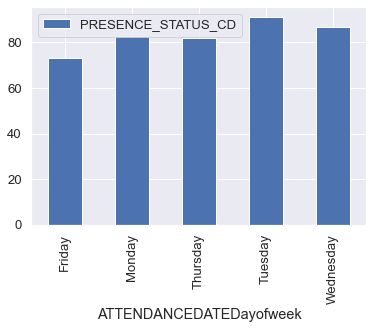

<IPython.core.display.Javascript object>

In [14]:
df_student = get_student_data(89271.0, ["ATTENDANCEDATEDayofweek"])
df_student.groupby("ATTENDANCEDATEDayofweek").count().plot(kind="bar")

# Week vs month for student

In [15]:
student_id = 89271
cond = "absent"
col_to_fetch = ["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"]

<IPython.core.display.Javascript object>

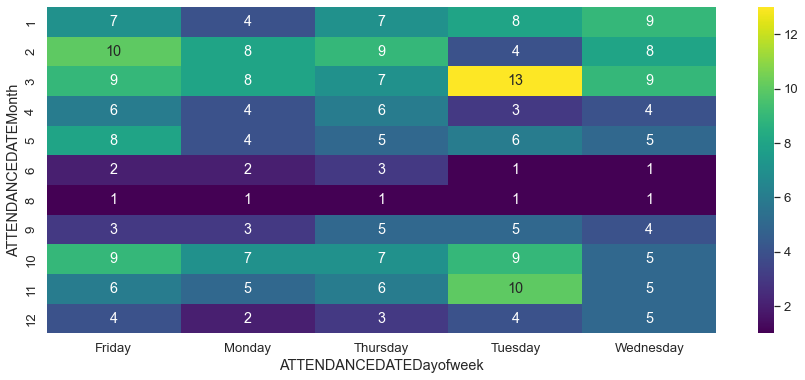

<IPython.core.display.Javascript object>

In [16]:
get_heat_map(student_id, col_to_fetch, cond)

# Week vs month for student

In [20]:
student_id = 88893
cond = "absent"
col_to_fetch = ["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"]

<IPython.core.display.Javascript object>

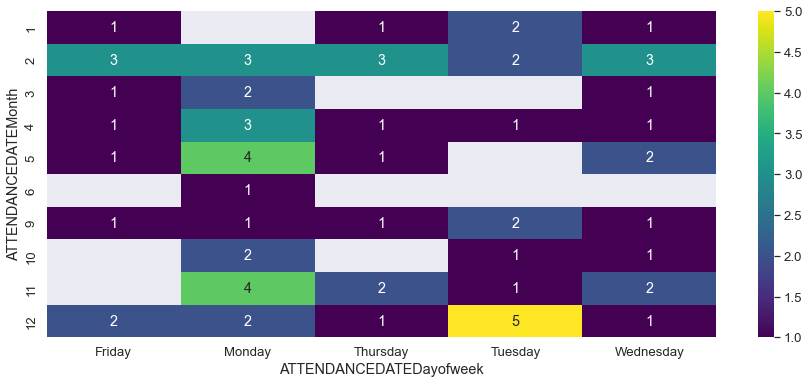

<IPython.core.display.Javascript object>

In [21]:
get_heat_map(student_id, col_to_fetch, cond)

# Week vs month for student

In [22]:
student_id = 129621
cond = "absent"
col_to_fetch = ["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"]

<IPython.core.display.Javascript object>

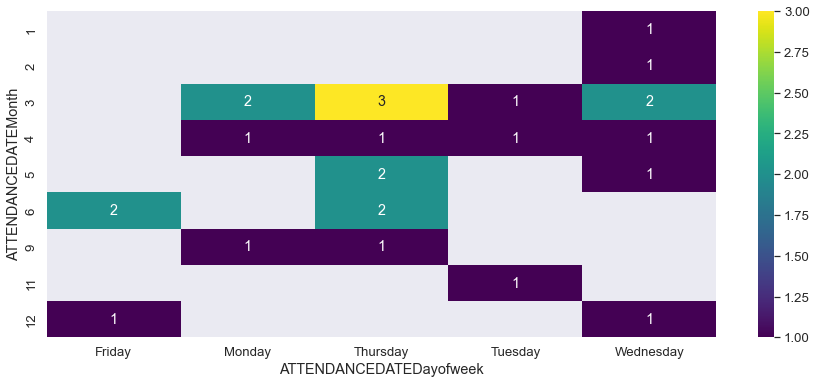

<IPython.core.display.Javascript object>

In [23]:
get_heat_map(student_id, col_to_fetch, cond)

# for grade 11,12

In [24]:
df_grade = df[df["GRADELEVEL"].isin([11, 12])]

<IPython.core.display.Javascript object>

<AxesSubplot:>

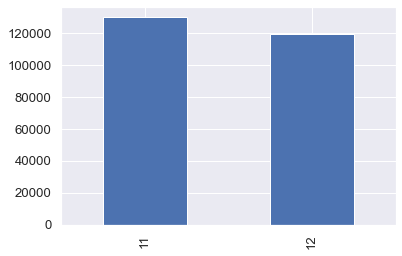

<IPython.core.display.Javascript object>

In [25]:
df_grade["GRADELEVEL"].value_counts().plot(kind="bar")

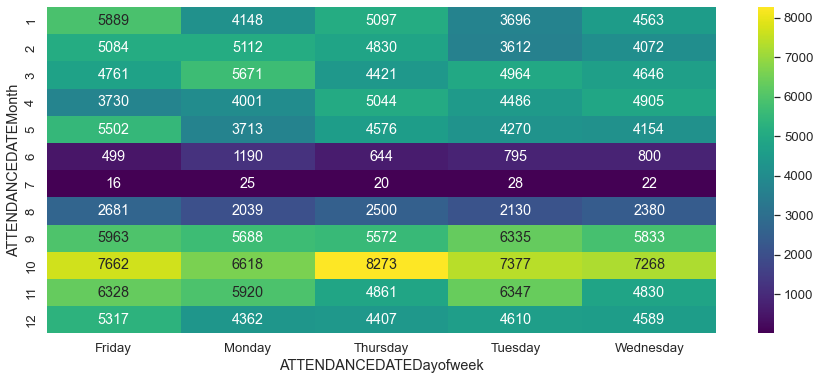

<IPython.core.display.Javascript object>

In [26]:
df_student = df_grade

plt.figure(figsize=(15, 6))
sns.heatmap(
    (
        df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"])[
            "PRESENCE_STATUS_CD"
        ].count()
    ).unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

# Heat plot for grade 11 & 12 

In [27]:
df_grade_presnt = df_grade[df_grade["PRESENCE_STATUS_CD"] == "Present"]

<IPython.core.display.Javascript object>

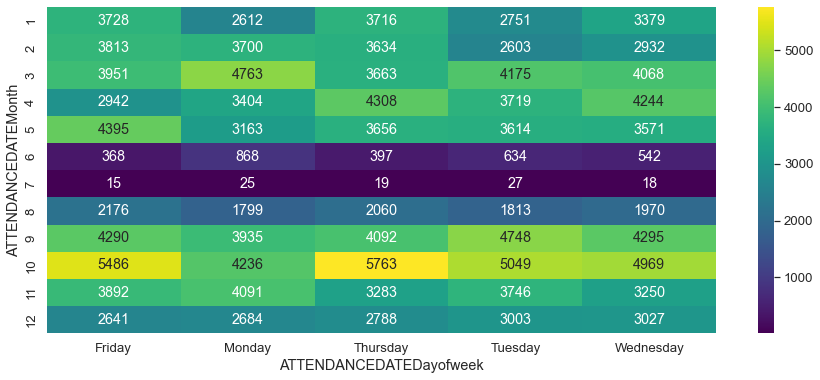

<IPython.core.display.Javascript object>

In [28]:
df_student = df_grade_presnt

plt.figure(figsize=(15, 6))
sns.heatmap(
    (
        df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"])[
            "PRESENCE_STATUS_CD"
        ].count()
    ).unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

# Heat plot for grade 11 & 12

In [29]:
df_grade_absent = df_grade[df_grade["PRESENCE_STATUS_CD"] == "Absent"]

<IPython.core.display.Javascript object>

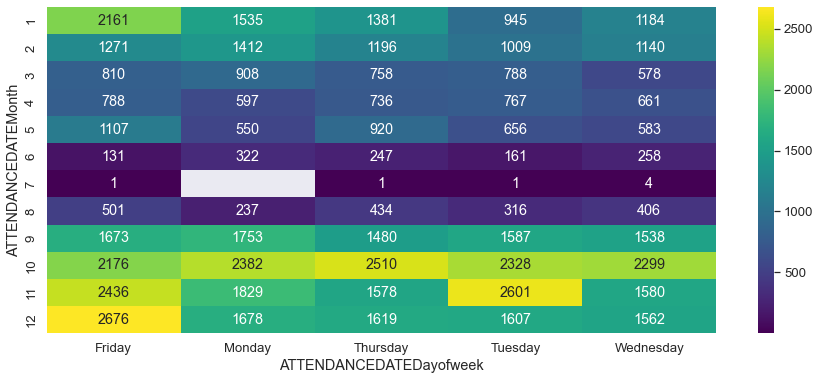

<IPython.core.display.Javascript object>

In [30]:
df_student = df_grade_absent

plt.figure(figsize=(15, 6))
sns.heatmap(
    (
        df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"])[
            "PRESENCE_STATUS_CD"
        ].count()
    ).unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()